### Geog 573 Advanced Geocomputing and Geospatial Big Data Analytics
<ul><li><b>Prof. Song Gao</b> (song.gao@wisc.edu)</li>
<li><b>TA: Yuhao Kang</b> (yuhao.kang@wisc.edu)</li></ul>
<b>Lab9 - Spatial Autocorrelation and Regression</b>

## Q1 (5 pt): 
In redistricting, the efficiency gap represents the difference between the parties’ respective wasted votes in an election—where a vote is wasted if it is cast (1) for a losing cadidate, or (2) for a winning candidate but in excess of what she needed to prevail. Please compute <b>the ratio of the wasted voted by one party (either Democratic party or Republican party)</b> using the 2020 US Presidential Election Data in Dane County, Wisconsin, and then compute the Global Spatial Autocorrelation Coefficient Moran's I for this new variable.  

Read examples about how to compute "the wasted votes by party": https://ballotpedia.org/Efficiency_gap

In [1]:
## install the requried PySAL packages first  
## https://pysal.org/docs/install/
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

ModuleNotFoundError: No module named 'esda'

(7078, 275)


,OBJECTID,GEOID,CNTY_FIPS,CNTY_NAME,COUSUBFP,MCD_FIPS,MCD_NAME,CTV,LABEL,LSAD,...,WSASCT12,WSSTOT12,WSSDEM12,WSSREP12,WSSREP212,WSSCON12,WSSIND12,WSSSCT12,WSSAME12,geometry
0,1,55001002750001,55001,Adams,00275,5500100275,Adams,C,Adams - C 0001,25,...,0.0,230.0,137.0,92.0,0.0,0.0,0.0,1.0,0.0,"POLYGON ((-89.82780 43.96684, -89.82795 43.966..."
1,2,55001002750002,55001,Adams,00275,5500100275,Adams,C,Adams - C 0002,25,...,0.0,224.0,135.0,89.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.80944 43.95238, -89.80945 43.953..."
2,3,55001002750003,55001,Adams,00275,5500100275,Adams,C,Adams - C 0003,25,...,0.0,100.0,60.0,40.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.79773 43.96678, -89.79774 43.966..."
3,4,55001002750004,55001,Adams,00275,5500100275,Adams,C,Adams - C 0004,25,...,0.0,125.0,75.0,50.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.81767 43.95958, -89.81778 43.964..."
4,5,55001003000001,55001,Adams,00300,5500100300,Adams,T,Adams - T 0001,43,...,0.0,335.0,185.0,150.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.71671 43.89444, -89.71671 43.894..."


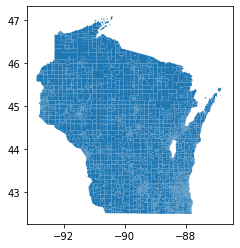

In [161]:
## Download the data from: https://data-ltsb.opendata.arcgis.com/datasets/2012-2020-election-data-with-2020-wards
## and put into a folder in your local directory
## 2012-2020 Election Data with 2020 Wards

gdf = gpd.read_file('./WI_Election/2012-2020_Election_Data_with_2020_Wards.geojson')
gdf.plot()
print(gdf.shape)
gdf.head()

In [ ]:
# Variables in each voting district (WARD)
# Democratic Votes: PREDEM20
# Republican Votes: PREREP20
# Total Votes:PRETOT20

In [88]:
dane_county= gdf[(gdf['CNTY_NAME']=='Dane')]
dane_county

,OBJECTID,GEOID,CNTY_FIPS,CNTY_NAME,COUSUBFP,MCD_FIPS,MCD_NAME,CTV,LABEL,LSAD,...,WSASCT12,WSSTOT12,WSSDEM12,WSSREP12,WSSREP212,WSSCON12,WSSIND12,WSSSCT12,WSSAME12,geometry
818,819,55025008750001,55025,Dane,00875,5502500875,Albion,T,Albion - T 0001,43,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.04186 42.86069, -89.04260 42.861..."
819,820,55025008750002,55025,Dane,00875,5502500875,Albion,T,Albion - T 0002,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.01307 42.93539, -89.01318 42.935..."
820,821,55025063000001,55025,Dane,06300,5502506300,Belleville,V,Belleville - V 0001,47,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.53044 42.86397, -89.53044 42.863..."
821,822,55025063000002,55025,Dane,06300,5502506300,Belleville,V,Belleville - V 0002,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.54878 42.87129, -89.54880 42.871..."
822,823,55025070250001,55025,Dane,07025,5502507025,Berry,T,Berry - T 0001,43,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.66636 43.11880, -89.66629 43.118..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,1302,55025515750022,55025,Dane,51575,5502551575,Middleton,C,Middleton - C 0022,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-89.53994 43.10518, -89.53994 43.105..."
1302,1303,55025776750016,55025,Dane,77675,5502577675,Stoughton,C,Stoughton - C 0016,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-89.25020 42.93934, -89.25079 42.939..."
1303,1304,55025786000027,55025,Dane,78600,5502578600,Sun Prairie,C,Sun Prairie - C 0027,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-89.19108 43.19881, -89.18827 43.198..."
1304,1305,55025877250010,55025,Dane,87725,5502587725,Windsor,V,Windsor - V 0010,47,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-89.34318 43.21204, -89.34334 43.212..."


In [1]:
import esda
import libpysal as lps

## Constract Spatial Weights

In [ ]:
#deal with missing value NaN
print(pd.isnull(dane_county['PREDEM20']).sum())
print(pd.isnull(dane_county['PREREP20']).sum())
print(pd.isnull(dane_county['PRETOT20']).sum())
dane_county['PREDEM20'].fillna((dane_county['PREDEM20'].mean()), inplace=True) 
dane_county['PREREP20'].fillna((dane_county['PREREP20'].mean()), inplace=True) 
dane_county['PRETOT20'].fillna((dane_county['PRETOT20'].mean()), inplace=True) 

## Q2 (5 pt): 

Continue the analysis based on the Dane county data, conduct the local spatial autocorrelation analysis with Moran's I. Then, plot the hotspots and coldspots on a geographic map based on the same variable: the ratio of the wasted voted by one party (either Democratic party or Republican party). Comment on the spatial patterns you find.

## Q3 (5 pt): 

Download the latest Airbnb house listing data (March 2023) for the city of Austin, Texas, United States http://insideairbnb.com/get-the-data/. Perform the GWR analysis for the median house price at the neighborhood scale using two variables: mean of “bedrooms” and mean of “review_scores_value”.  Report the overall R-squared value of the GWR model and plot the spatial distributions of local R-squared, coefficient of mean_bedrooms, and coefficient of mean_review_scores_value on the map, respectively.  

,neighbourhood,neighbourhood_group,geometry
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ..."
1,78754,None,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ..."
2,78732,None,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ..."
3,78737,None,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ..."
4,78756,None,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ..."
5,78747,None,"MULTIPOLYGON (((-97.73617 30.15986, -97.73591 ..."
6,78751,None,"MULTIPOLYGON (((-97.70677 30.32211, -97.70693 ..."
7,78712,None,"MULTIPOLYGON (((-97.73366 30.28536, -97.73295 ..."
8,78738,None,"MULTIPOLYGON (((-98.00622 30.36079, -98.00424 ..."
9,78725,None,"MULTIPOLYGON (((-97.62338 30.26459, -97.62126 ..."


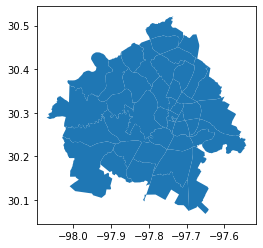

In [164]:
gdf = gpd.read_file('neighbourhoods.geojson')
gdf=gdf.set_crs(crs='EPSG:4326')
gdf.plot()
gdf

In [166]:
## load the house listing POINT data 
bl_df = pd.read_csv('listings.csv.gz',compression='gzip')
geometry = [Point(xy) for xy in zip(bl_df.longitude, bl_df.latitude)]
bl_gdf = GeoDataFrame(bl_df, geometry=geometry)
bl_gdf=bl_gdf.set_crs(crs='EPSG:4326')
print(bl_gdf.columns)
bl_gdf['price']=bl_gdf['price'].str.replace('$','')
bl_gdf['price']=bl_gdf['price'].str.replace(',','')
bl_gdf

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

/tmp/ipykernel_326/2472021966.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bl_gdf['price']=bl_gdf['price'].str.replace('$','')


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry
0,5456,https://www.airbnb.com/rooms/5456,20230316044216,2023-03-16,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.73,4.79,NaN,f,2,2,0,0,3.69,POINT (-97.73441 30.26057)
1,5769,https://www.airbnb.com/rooms/5769,20230316044216,2023-03-16,previous scrape,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.76,4.92,NaN,f,1,0,1,0,1.75,POINT (-97.78422 30.45697)
2,6413,https://www.airbnb.com/rooms/6413,20230316044216,2023-03-16,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,...,4.87,4.93,NaN,f,1,1,0,0,0.76,POINT (-97.73587 30.24885)
3,6448,https://www.airbnb.com/rooms/6448,20230316044216,2023-03-16,city scrape,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/4513152/4ffc1...,14156,...,4.97,4.90,NaN,t,1,1,0,0,2.10,POINT (-97.76487 30.26034)
4,8502,https://www.airbnb.com/rooms/8502,20230316044216,2023-03-17,city scrape,Woodland Studio Lodging,Studio rental on lower level of home located i...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,25298,...,4.64,4.57,NaN,f,1,1,0,0,0.30,POINT (-97.73682 30.23466)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14363,847159076072987428,https://www.airbnb.com/rooms/847159076072987428,20230316044216,2023-03-17,city scrape,Central Austin Bungalow!,"This is a 4 bedroom, 2 bathroom condo in the h...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,276920863,...,NaN,NaN,NaN,t,41,41,0,0,NaN,POINT (-97.74727 30.28922)
14364,847171709264672413,https://www.airbnb.com/rooms/847171709264672413,20230316044216,2023-03-17,city scrape,Fresh Austin Studio Apartment!,Keep it simple at this peaceful and centrally-...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,276920863,...,NaN,NaN,NaN,t,41,41,0,0,NaN,POINT (-97.74850 30.29024)
14365,847178203609366885,https://www.airbnb.com/rooms/847178203609366885,20230316044216,2023-03-16,city scrape,Quaint Austin Condo!,"In the heart of Central Austin, you can't go w...",NaN,https://a0.muscache.com/pictures/537356ed-2938...,276920863,...,NaN,NaN,NaN,t,41,41,0,0,NaN,POINT (-97.72664 30.28723)
14366,847256590826352221,https://www.airbnb.com/rooms/847256590826352221,20230316044216,2023-03-16,city scrape,NEW! Aqua Azul Outdoors - Near Lake Travis,"Escape to our charming home, just a stone's th...","About 20 miles northwest of downtown Dustin, H...",https://a0.muscache.com/pictures/prohost-api/H...,499116561,...,NaN,NaN,NaN,f,1,1,0,0,NaN,POINT (-97.95286 30.38171)


In [149]:
bl_gdf['neighbourhood_cleansed']

0        78702
1        78729
2        78704
3        78704
4        78741
         ...  
14363    78705
14364    78705
14365    78705
14366    78734
14367    78741
Name: neighbourhood_cleansed, Length: 14368, dtype: int64

In [137]:
import numpy as np
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [167]:
## Process the data and compute the median house price per neighborhood polygon  
## Computer the means of other explainable variables 

bl_gdf['price'] = bl_gdf['price'].astype('float32')
sj_gdf = gpd.sjoin(gdf, bl_gdf, how='inner', predicate='intersects', lsuffix='left', rsuffix='right')
median_price_gb = sj_gdf['price'].groupby([sj_gdf['neighbourhood_cleansed']]).median()
median_price_gb

neighbourhood_cleansed
78701     279.0
78702     232.0
78703     250.0
78704     203.0
78705     141.0
78712    1035.0
78717     110.0
78719      90.0
78721     180.5
78722     170.0
78723     162.0
78724     135.0
78725     175.0
78726     154.0
78727     125.0
78728     109.0
78729     124.5
78730     245.0
78731     250.0
78732     350.0
78733     317.0
78734     297.0
78735     170.5
78736     183.5
78737     245.5
78738     158.0
78739     256.0
78741     131.0
78742     146.0
78744     130.5
78745     158.0
78746     385.0
78747     104.5
78748     128.0
78749     150.0
78750     127.0
78751     121.0
78752     110.5
78753     118.5
78754     100.0
78756     134.0
78757     149.0
78758     129.0
78759     140.0
Name: price, dtype: float32

<class 'pandas.core.indexes.numeric.Int64Index'>
<class 'pandas.core.indexes.base.Index'>


,neighbourhood,neighbourhood_group,geometry,median_pri
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",361.000000
1,78754,None,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ...",171.225800
2,78732,None,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ...",842.657898
3,78737,None,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ...",448.629211
4,78756,None,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ...",191.630768
5,78747,None,"MULTIPOLYGON (((-97.73617 30.15986, -97.73591 ...",166.784317
6,78751,None,"MULTIPOLYGON (((-97.70677 30.32211, -97.70693 ...",155.122604
7,78712,None,"MULTIPOLYGON (((-97.73366 30.28536, -97.73295 ...",1035.000000
8,78738,None,"MULTIPOLYGON (((-98.00622 30.36079, -98.00424 ...",289.478882
9,78725,None,"MULTIPOLYGON (((-97.62338 30.26459, -97.62126 ...",228.195404


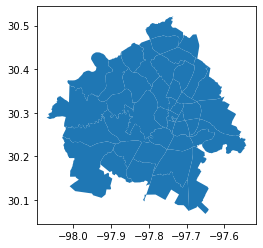

In [163]:
median_price_gb.rename("neighbourhood")
median_price_gb.index = median_price_gb.index.map(str) ## ensure the index key has the same data type of string
gdf['neighbourhood'] = gdf['neighbourhood'].astype('string')
gdf = gdf.join(median_price_gb, on='neighbourhood')
gdf.rename(columns={'price': 'median_pri'}, inplace=True)
gdf.plot()
gdf

## Perform the GWR analysis

In [ ]:
## https://github.com/pysal/mgwr/blob/master/notebooks/GWR_Georgia_example.ipynb
